# Exercise Set 6

## Exercise 1: Quantized Energy Levels

### Part a:

Start by assuming the finite square well with depth $83 \; \mathrm{MeV}$ and radius $2 \; \mathrm{fm}$. Using the mass of the proton, use the Numerov method to solve for the allowed energies in the well.

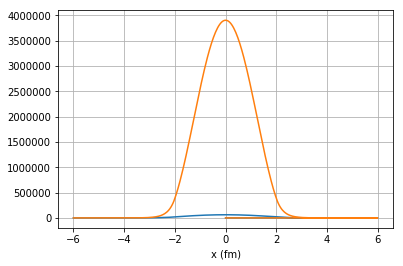

-74.90401464700699 MeV


In [28]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -6;   xr0   =  6                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -83 ; amax  = -70                     # root limits #-83 to -70 for fundamental #-75 to -50 for first order, #-30 to -15 for second order 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=2):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

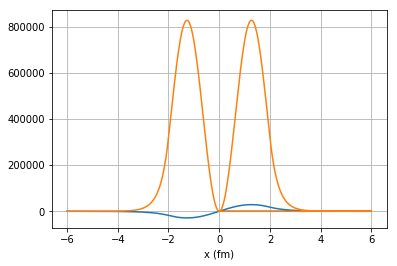

-51.38390734791756 MeV


In [27]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -6;   xr0   =  6                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -75 ; amax  = -50                     # root limits #-83 to -70 for fundamental #-75 to -50 for first order, #-30 to -15 for second order 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=2):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    #print (e)
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

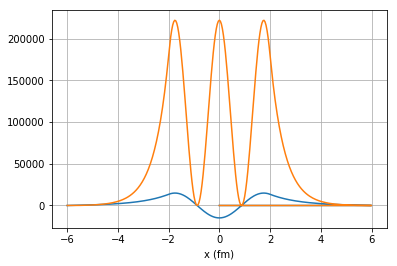

-16.19497686624527 MeV


In [26]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -6;   xr0   =  6                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -30 ; amax  = -15                     # root limits #-83 to -70 for fundamental #-75 to -50 for first order, #-30 to -15 for second order 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=2):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    #print (e)
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

### Part b:

Plot the allowed wave functions on the same figure as the potential. (You will have to scale one of them to make them both fit.) Draw a horizontal line to represent each of the allowed energies.

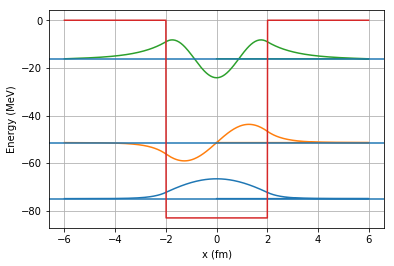

In [25]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

s = 8

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -6;   xr0   =  6                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -83 ; amax  = -70                     # root limits #-83 to -70 for fundamental #-75 to -50 for first order, #-30 to -15 for second order 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=2):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], (psi[1]/60000)*s + e) #normalized
plt.axhline(e, -6, 6)

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -6;   xr0   =  6                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -75 ; amax  = -50                     # root limits #-83 to -70 for fundamental #-75 to -50 for first order, #-30 to -15 for second order 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=2):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.plot(psi[0], (psi[1]/30000)*s + e) #normalized
plt.axhline(e, -6, 6)


""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -6;   xr0   =  6                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -30 ; amax  = -15                     # root limits #-83 to -70 for fundamental #-75 to -50 for first order, #-30 to -15 for second order 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=2):
        v = -83.0                            
    else:
        v = 0
    return v

V_values = np.zeros(1000)

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.plot(psi[0], (psi[1]/15000)*s + e) #normalized
plt.axhline(e, -6, 6)


X = np.arange(-6,6,0.01)
V_values = []

for x in X:
    V_values.append(V(x))

plt.plot(X, V_values)

plt.grid()

plt.ylabel('Energy (MeV)')
plt.xlabel('x (fm)')

plt.show()

### Part c:

Check to see how the bound-state energies change when the radius of the well changes. Start by increasing the radius by a factor of 2.

#### Ground State:

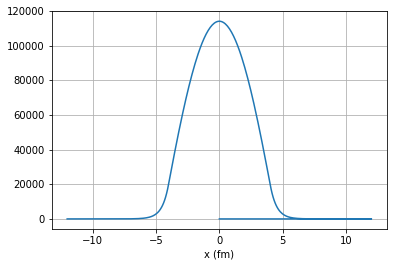

-80.48850893974304 MeV


In [24]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -12;   xr0   =  12                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -83 ; amax  = -80                  # root limits #-83 to -80 for fundamental #-80 to -70 for first order, #-70 to -60 for second order #-50 to -35 for third order #-35 to -20 for fourth order
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=4):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
#plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

#### First Excited State:

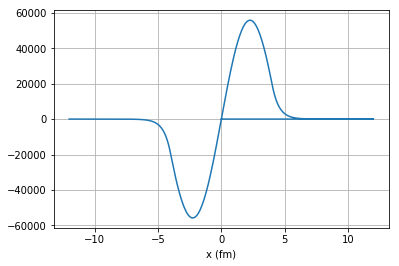

-72.98989236354828 MeV


In [23]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -12;   xr0   =  12                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -80 ; amax  = -70                  # root limits #-83 to -80 for fundamental #-80 to -70 for first order, #-70 to -60 for second order #-50 to -35 for third order #-35 to -20 for fourth order
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=4):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
#plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

#### Second Excited State:

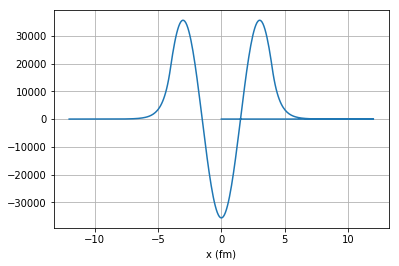

-60.62672436237335 MeV


In [22]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -12;   xr0   =  12                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -70 ; amax  = -60                  # root limits #-83 to -80 for fundamental #-80 to -70 for first order, #-70 to -60 for second order #-50 to -35 for third order #-35 to -20 for fourth order
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=4):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
#plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

#### Third Excited State:

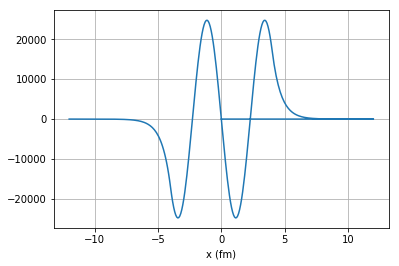

-43.672684133052826 MeV


In [21]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -12;   xr0   =  12                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -50 ; amax  = -35                  # root limits #-83 to -80 for fundamental #-80 to -70 for first order, #-70 to -60 for second order #-50 to -35 for third order #-35 to -20 for fourth order
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=4):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
#plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

#### Fourth Excited State:

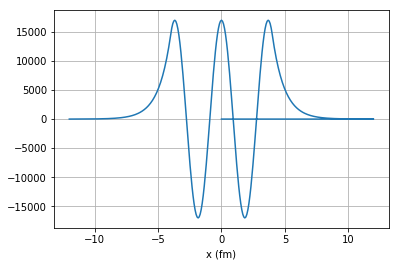

-22.793752253055573 MeV


In [19]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -12;   xr0   =  12                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -35 ; amax  = -20                  # root limits #-83 to -80 for fundamental #-80 to -70 for first order, #-70 to -60 for second order #-50 to -35 for third order #-35 to -20 for fourth order
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=4):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
#plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

When the well gets wider, the energies get lower and there are more allowed energies.

**Cutting the radius down to $1 \mathrm{fm}$**

**Ground State:**

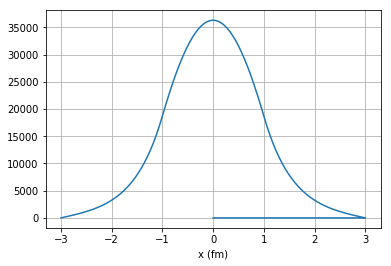

-61.053597420454025 MeV


In [20]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumNumerov:        Quantum BS via Numerov ODE solver + search

import numpy as np
import matplotlib.pyplot as plt

psi = np.zeros((2, 1000))
psio = np.zeros((2, 1000))

dl    = 1e-6                      # very small interval to stop bisection
ul    = np.zeros(1501)            #eigenfunction from left side of matching point
ur    = np.zeros(1501)            #eignenfunction from right side of matching point
k2l   = np.zeros(1501)                        # k**2 left wavefunc
k2r   = np.zeros(1501)                         
n     = 1501
m     = 5                                           # plot every 5 points
imax  = 1000 
xl0   = -3;   xr0   =  3                   # leftmost, rightmost x  
h     = 1.0*(xr0-xl0)/(n-1.)            
amin  = -83 ; amax  = -60                 
e     = amin                                            # Initial E guess
de    = 0.01
ul[0] = 0.0; ul[1] = 0.00001; ur[0] = 0.0; ur[1] = 0.00001     
im = 1000                                                   # match point index
nl = im+2;   nr = n-im+1                                # left, right wv
istep=0

def V(x):                                                   # Square well
    if (abs(x)<=1):
        v = -83.0                            
    else:
        v = 0
    return v

def setk2():                                                       #  k2  
    for i in range(0,n):         
       xl = xl0+i*h
       xr = xr0-i*h
       k2l[i] = (0.0483)*(e-V(xl))
       k2r[i] = (0.0483)*(e-V(xr))

def numerov (n,h,k2,u):                             # Numerov algorithm  
    b=(h**2)/12.0                          
    for i in range(1, n-1):  
      u[i+1] = (2*u[i]*(1-5*b*k2[i])-(1.+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

setk2()
numerov (nl, h, k2l, ul)                                       # Left psi
numerov (nr, h, k2r, ur)                                      # Right psi
fact= ur[nr-2]/ul[im]                                             # Scale left side to meet scale of right side
for i  in range (0,nl): ul[i] = fact*ul[i]                        #multiply all the left side values by the scaling factor
f0 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2])    #  Log deriv (want this equal to zero) (psi'/psi)

def normalize():    
    asum = 0
    for i in range( 0,n):                     
        if i > im :
            ul[i] = ur[n-i-1]
            asum = asum+ul[i]*ul[i]
    asum        = np.sqrt(h*asum); 
    j=0
    for i in range(0,n,m):                   
        xl        = xl0 + i*h
        ul[i]     = ul[i]/asum                 # wave function normalized
        psi[0][j]  = xl                                   # plot psi
        psi[1][j]  = 10000.0*ul[i]       # vertical line for match of wvfs
        psio[0][j] = xl                                     # plot psi
        psio[1][j] = 1.0e5*ul[i]**2
        j +=1
        
while abs(de) > dl and istep < imax :               # bisection algorithm
    e1 = e                                                  
    e  = (amin+amax)/2
    for i in range(0,n):  
        k2l[i] = k2l[i] + (0.0483)*(e-e1)             
        k2r[i] = k2r[i] + (0.0483)*(e-e1)
    numerov (nl,h,k2l,ul)                              # New wavefuntions
    numerov (nr,h,k2r,ur)               
    fact = ur[nr-2]/ul[im]
    for i in range(0,nl):  ul[i] = fact*ul[i] 
    f1 = (ur[nr-1]+ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # Log deriv
    if f0*f1 < 0:                               # Bisection localize root
        amax = e
        de = amax - amin
    else:
         amin = e
         de = amax - amin
         f0 = f1
    normalize()     
    istep = istep + 1

plt.figure()
plt.plot(psi[0], psi[1]) #normalized
#plt.plot(psio[0], psio[1]) #unormalized
plt.grid()
plt.xlabel('x (fm)')
plt.show()
print(e, 'MeV')

This well is so narrow that there isn't even a first excited state!

## Exercise 2: Pythagorean (or Euler) 3-body Problem

They pythagorean version of the Euler 3-body problem has 3 masses at all the corners of a 3-4-5- right triangle.

The force on each mass $m_i$ is the sume of the gravitational forces from the other masses:

$$ \vec{F_i} = -G\sum_{i \neq j} m_i m_j \frac{\vec{r_i}-\vec{r_j}}{|\vec{r_i}-\vec{r_j}|^3}$$

With units arranged so that $G=1$, the masses have alues $m_A = 3$, $m_B = 4$, and $m_C = 5$, and they are at rest at $t=0$ at coordinates $(0,4)$, $(-3,0)$, and $(0,0)$ respectively.

### Part a:

FInd the motion of the ststem over the interval $t=0$ to $t=10$. (If you have time, try to use teh animation functions.)

<function matplotlib.pyplot.show>

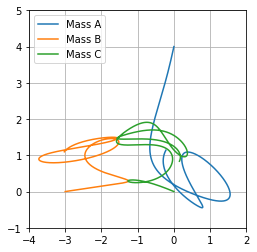

In [13]:
from scipy.integrate import odeint as ODEint
import numpy as np
import matplotlib.pyplot as plt

m_A = 3. #set masses for bodies A, B, and C
m_B = 4.
m_C = 5.
initial_positions = [0., 4., -3., 0., 0., 0.] #[x_A, y_A, x_B, y_B, x_C, y_C]
initial_velocities = [0., 0., 0., 0., 0., 0.] #[x_A', y_A', x_B', y_B', x_C', y_C']
initial_conditions = np.array(initial_positions + initial_velocities) #[x_A, y_A, x_B, y_B, x_C, y_C, x_A', y_A', x_B', y_B', x_C', y_C']
Out = np.zeros(12)
t = np.linspace(0, 10., 50001) #array of times at which to find the positions of the bodies
tol = 1e-9 #tolerance for ODEint
hmax = 1e-4 #hmax for ODEint

def deriv(initial_conditions, t): #returns change in position and change in velocity in a time dt
    
    Out[:6] = initial_conditions[6:]
    
    distance_AB = initial_conditions[0:2] - initial_conditions[2:4] #r_A - r_B
    distance_BA = -distance_AB        #r_B - r_A
    distance_AC = initial_conditions[0:2] - initial_conditions[4:6] #r_A - r_C
    distance_CA = -distance_AC        #r_C - r_A
    distance_BC = initial_conditions[2:4] - initial_conditions[4:6] #r_B - r_C
    distance_CB = -distance_BC         #r_C - r_B
    
    Out[6:8] = -m_B * (distance_AB/np.linalg.norm(distance_AB)**3) - m_C * (distance_AC/np.linalg.norm(distance_AC)**3) #x_A'', y_A''
    Out[8:10] = -m_A * (distance_BA/np.linalg.norm(distance_BA)**3) - m_C * (distance_BC/np.linalg.norm(distance_BC)**3) #x_B'', y_B''
    Out[10:12] = -m_A * (distance_CA/np.linalg.norm(distance_CA)**3) - m_B * (distance_CB/np.linalg.norm(distance_CB)**3) #x_C'', y_C''
    
    return Out

positions = ODEint(deriv, initial_conditions, t, rtol=tol, hmax=hmax) #solves ODEs over the time interval t


plt.figure()
plt.plot(positions[: , 0], positions[: , 1])
plt.plot(positions[: , 2], positions[: , 3])
plt.plot(positions[: , 4], positions[: , 5])
plt.legend(['Mass A', 'Mass B', 'Mass C'])
plt.axis([-4,2,-1,5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show

### Part b:

A new, stable solution for the equal-mass 3-body problem was discovered in 2000 by Prof. R. Montgomery (UCSC) and A.Chenciner (Annals of Mathematics **152**: 881-901). Find the motion of the 3-body system with all 3 masses set to $m=1$, $G=1$, and the same initial rest conditions as the last part. This systems is called the "figure-eight" orbit.

<function matplotlib.pyplot.show>

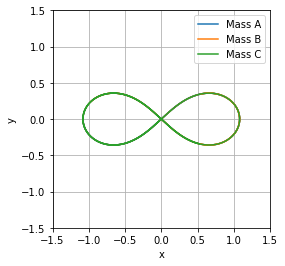

In [15]:
from scipy.integrate import odeint as ODEint
import numpy as np
import matplotlib.pyplot as plt

m_A = 1.
m_B = 1.
m_C = 1.
initial_positions = [0.97000436, -0.24308753, -0.97000436, 0.24308753, 0., 0.] #[x_A, y_A, x_B, y_B, x_C, y_C]
initial_velocities = [0.93240737/2.0, 0.86473146/2.0, 0.93240737/2.0, 0.86473146/2.0, -0.93240737, -0.86473146] #[x_A', y_A', x_B', y_B', x_C', y_C']
initial_conditions = np.array(initial_positions + initial_velocities)
Out = np.zeros(12)
t = np.linspace(0, 10., 50001)
tol = 1e-9
hmax = 1e-4

def deriv(initial_conditions, t):
    
    Out[:6] = initial_conditions[6:]
    
    distance_AB = initial_conditions[0:2] - initial_conditions[2:4] #r_A - r_B
    distance_BA = -distance_AB        #r_B - r_A
    distance_AC = initial_conditions[0:2] - initial_conditions[4:6] #r_A - r_C
    distance_CA = -distance_AC        #r_C - r_A
    distance_BC = initial_conditions[2:4] - initial_conditions[4:6] #r_B - r_C
    distance_CB = -distance_BC         #r_C - r_B
    
    Out[6:8] = -m_B * (distance_AB/np.linalg.norm(distance_AB)**3) - m_C * (distance_AC/np.linalg.norm(distance_AC)**3)
    Out[8:10] = -m_A * (distance_BA/np.linalg.norm(distance_BA)**3) - m_C * (distance_BC/np.linalg.norm(distance_BC)**3)
    Out[10:12] = -m_A * (distance_CA/np.linalg.norm(distance_CA)**3) - m_B * (distance_CB/np.linalg.norm(distance_CB)**3)
    
    return Out

positions = ODEint(deriv, initial_conditions, t, rtol=tol, hmax=hmax)


plt.figure()
plt.plot(positions[: , 0], positions[: , 1])
plt.plot(positions[: , 2], positions[: , 3])
plt.plot(positions[: , 4], positions[: , 5])
plt.axis([-1.5,1.5,-1.5,1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['Mass A', 'Mass B', 'Mass C'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show

### Part c:

Check the stability of the "figure-eight" orbit changing the initial conditions slightly and checking the orbig again.

<function matplotlib.pyplot.show>

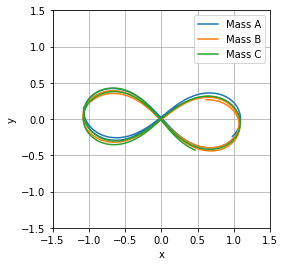

In [29]:
from scipy.integrate import odeint as ODEint
import numpy as np
import matplotlib.pyplot as plt

m_A = 1.
m_B = 1.
m_C = 1.
initial_positions = [0.98, -0.24, -0.97, 0.24, 0., 0.] #[x_A, y_A, x_B, y_B, x_C, y_C]
initial_velocities = [0.93/2.0, 0.86/2.0, 0.93/2.0, 0.86/2.0, -0.93, -0.86] #[x_A', y_A', x_B', y_B', x_C', y_C']
initial_conditions = np.array(initial_positions + initial_velocities)
Out = np.zeros(12)
t = np.linspace(0, 10., 50001)
tol = 1e-9
hmax = 1e-4

def deriv(initial_conditions, t):
    
    Out[:6] = initial_conditions[6:]
    
    distance_AB = initial_conditions[0:2] - initial_conditions[2:4] #r_A - r_B
    distance_BA = -distance_AB        #r_B - r_A
    distance_AC = initial_conditions[0:2] - initial_conditions[4:6] #r_A - r_C
    distance_CA = -distance_AC        #r_C - r_A
    distance_BC = initial_conditions[2:4] - initial_conditions[4:6] #r_B - r_C
    distance_CB = -distance_BC         #r_C - r_B
    
    Out[6:8] = -m_B * (distance_AB/np.linalg.norm(distance_AB)**3) - m_C * (distance_AC/np.linalg.norm(distance_AC)**3)
    Out[8:10] = -m_A * (distance_BA/np.linalg.norm(distance_BA)**3) - m_C * (distance_BC/np.linalg.norm(distance_BC)**3)
    Out[10:12] = -m_A * (distance_CA/np.linalg.norm(distance_CA)**3) - m_B * (distance_CB/np.linalg.norm(distance_CB)**3)
    
    return Out

positions = ODEint(deriv, initial_conditions, t, rtol=tol, hmax=hmax)


plt.figure()
plt.plot(positions[: , 0], positions[: , 1])
plt.plot(positions[: , 2], positions[: , 3])
plt.plot(positions[: , 4], positions[: , 5])
plt.axis([-1.5,1.5,-1.5,1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend(['Mass A', 'Mass B', 'Mass C'])
plt.xlabel('x')
plt.ylabel('y')
plt.show

## Exercise 3:

Even though the equation of a vibrating string (with leng $L$, linear mass density $\mu(x)$, and tension $T$) is a prtial differential equation

$$ \frac{\partial^2u(x,t)}{\partial{t}^2} = \frac{T}{\mu(x)}\frac{\partial^2u(x,t)}{\partial{x}^2}$$

the use of a solution $u(x,t) = y(x)\tau(t) allows us to seperate the equation into a spatial side and a temporal side:

$$ \frac{1}{y(x)}\frac{T}{\mu(x)}\frac{d^2 y}{dx^2} = \frac{1}{\tau(t)}\frac{d^2 \tau}{dt^2} $$

The separtaion constant is taken to be $-\omega^2$.

### Part a:

Show that if $\mu(x)$ is a constant $\mu_0$, then the spatial soultion is

$$ y(x) = \alpha \sin{\omega} \sqrt{\frac{\mu_0}{T}}x + \beta \cos{\omega} \sqrt{\frac{\mu_0}{T}}x $$

Plugging $y(x)$ into the equation:

$$ \frac{1}{y(x)}\frac{T}{\mu(x)}\frac{d^2 y}{dx^2} = -\omega^2 $$

we find

$$\frac{1}{\alpha \sin{\omega} \sqrt{\frac{\mu_0}{T}}x + \beta \cos{\omega} \sqrt{\frac{\mu_0}{T}}x} * \frac{T}{\mu_0} * \bigg(-\alpha \omega^2 \frac{\mu_0}{T} \sin{\omega} \sqrt{\frac{\mu_0}{T}}x - \beta \omega^2 \frac{\mu_0}{T}\cos{\omega} \sqrt{\frac{\mu_0}{T}}x\bigg) = -\omega^2$$

which, by pulling out $-\omega^2$ out of the right side simplifies to:

$$1=1$$

which is true, so $y(x)$ is in fact a solution to the spatial part of the differential equation.

### Part b:

Set the boundary condition $y(x) = 0$ at the ends of the string, and show that hte allowed values of $\omega$ are

$$\omega = \frac{n \pi}{L}\sqrt{\frac{T}{\mu_0}} $$

The first boundary condition $y(0) = 0$ implies that $\beta = 0$

The second boundary conditiont $y(L) = 0$ implies that $\alpha \sin(\omega \sqrt{\frac{\mu_0}{T}}L) = 0$ which tells us that:

$$\omega \sqrt{\frac{\mu_0}{T}} L = n \pi$$

from which we conclude:

$$ \omega = \frac{n \pi}{L} \sqrt{\frac{T}{\mu_0}}$$

### Part c:

Now use the shooting method with the boundary conditions to find the lowest frequency of the string and plot the eigenfunction (shape). Take $L=1 \mathrm{m}$, $m=0.954 \mathrm{g}$, and $T = 1000 \mathrm{N}$. Assume a constant linear mass density $\mu_0 = 0.954 \mathrm{g/m}$ for this part.

Breaking the spatial component into two first-order differential equations, we find:

$$ \frac{dy_1}{dx} = y_2$$

$$ \frac{dy_2}{dx} = -\omega^2 \frac{\mu_0}{T} y_1(x)$$

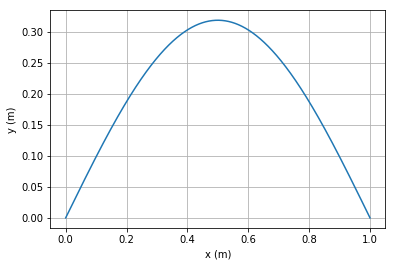

omega = 3217
The final answer is within -7.353595183566411e-05 of the boundary condition


In [31]:
%matplotlib inline

# Example of the shooting method for projectile motion

import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

yReturn = np.zeros(2)

L = 1
m = 0.000954
T = 1000
mu_0 = 0.000954
omega = 3217

def derivs(state, x):
    yReturn[0] = state[1]                                                    
    yReturn[1] = -omega**2 * (mu_0/T) * state[0]
    return yReturn

dx = 0.0001
x = np.arange(0.0, 1, dx)

# initial state
state = ([0., 1.])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, x)
plt.plot(x, y[:, 0])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

error = y[:,0][-1]

print ('omega =', omega)
print ('The final answer is within', error, 'of the boundary condition')

### Part d:

Repeat the shooting method with a non-uniform $\mu(x) = 0.954 \mathrm{g/m} + (x - \frac{L}{2})0.8 \mathrm{g/m^2}$. Plot this eigenfunction (shape) and compare with the previous part.

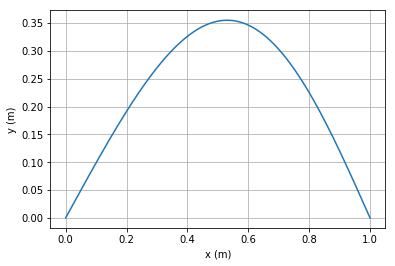

omega = 3205
The final answer is within -7.593343606342347e-05 of the boundary condition


In [30]:
%matplotlib inline

# Example of the shooting method for projectile motion

import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

yReturn = np.zeros(2)

L = 1
m = 0.000954
T = 1000
omega = 3205

def mu(x):
    return 0.000954 + (x - L/2)*0.0008

def derivs(state, x):
    yReturn[0] = state[1]                                                    
    yReturn[1] = -omega**2 * (mu(x)/T) * state[0]
    return yReturn

dx = 0.0001
x = np.arange(0.0, 1, dx)

# initial state
state = ([0., 1.])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, x)
plt.plot(x, y[:, 0])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.show()

error = y[:,0][-1]

print ('omega =', omega)
print ('The final answer is within', error, 'of the boundary condition')

Given this $x$ dependence for $\mu$, the shape of the wave is such that the peak is skewed ever-so-slightly right of center.